# Selenium 
Это проект, в рамках которого разрабатывается серия программных продуктов с открытым исходным кодом (open source):
* Selenium WebDriver,
* Selenium RC,
* Selenium Server,
* Selenium Grid,
* Selenium IDE.

Называть просто словом Selenium любой из этих пяти продуктов, вообще говоря, неправильно, хотя так часто делают, если из контекста понятно, о каком именно из продуктов идёт речь, или если речь идёт о нескольких продуктах одновременно, или обо всех сразу.

## Selenium WebDriver 
Инструмент для автоматизации действий веб-браузера. В большинстве случаев используется для тестирования Web-приложений, но этим не ограничивается. В частности, он может быть использован для решения рутинных задач администрирования сайта или регулярного получения данных из различных источников (сайтов). Используется редко, однако несет важный характер.

Прежде всего, вы должны помнить, что Selenium предназначен для автоматизации тестирования веб-приложений. Он позволяет разработчику писать тесты на нескольких популярных языках программирования, таких как C#, Java, Python, Ruby и другие. Эта среда разработана для автоматизации браузера. Давайте посмотрим на пример кода, который автоматизирует браузер.

## Сравним Selenium и BeautifulSoup
### Гибкость
**Beautiful Soup:** Когда речь идет о небольшом проекте, или о низкоуровневом сложном проекте Beautiful Soup может выполнить задачу довольно хорошо. Это помогает нам поддерживать наш код простым и гибким.

**Selenium:** когда вы имеете дело с Javascript на сайте, Selenium будет лучшим выбором. но размер данных должен быть ограничен.
### Производительность
**Beautiful Soup:** довольно медленно выполняет определенную задачу, но мы можем преодолеть эту проблему с помощью концепции многопоточности, но программисту необходимо знать концепцию многопоточности очень хорошо. Это обратная сторона Beautiful Soup.

**Selenium:** он может работать довольно быстро, но не эквивалентно Scrapy.

Selenium упрощает работу с браузером. В основном это нужно для автоматизации тестирования веб-приложений. Но мы также можем использовать его для скраппинга сайтов :)

Перейдем к примерам:

Шпаргалка по установке: https://selenium-python.readthedocs.io/installation.html

Мы же, чтобы сильно не заморачиваться, будем использовать автоматический установщик и браузер Chrome. 

P.S. Selenium может работать почти с любым браузером, нужно лишь правильно установить драйвер браузера.

In [1]:
try:
    import selenium
except:
    !pip install selenium

  Using cached h11-0.13.0-py3-none-any.whl (58 kB)


In [2]:
try:
    import webdriver_manager
except:
    !pip install webdriver_manager

Попробуем открыть google и что-то вбить в поисковике (наконец-то вас этому научат xD):

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

driver.get("https://www.google.com/")
  
element = driver.find_element(by=By.NAME, value='q') # Открываем google.com, находим name у поисковой строки
element.send_keys("А как гуглить?")  # Записываем строки в поиск




====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\Nick\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache


In [6]:
element.clear()  #  Очищаем поисковую строку от бесполезного запроса
element.send_keys("nometa.xyz")  # Добавляем полезный запрос
element.send_keys(Keys.ENTER)  # Имитируем нажатие клавиши Enter (Можно было добавить в конец запроса '\n')

Мы научились заполнять формы. Нам осталось научиться кликать на кнопки и тогда мы сможем проходить авторизацию на сайтах.
Для этого нужно зайти на страницу и скопировать полный xpath 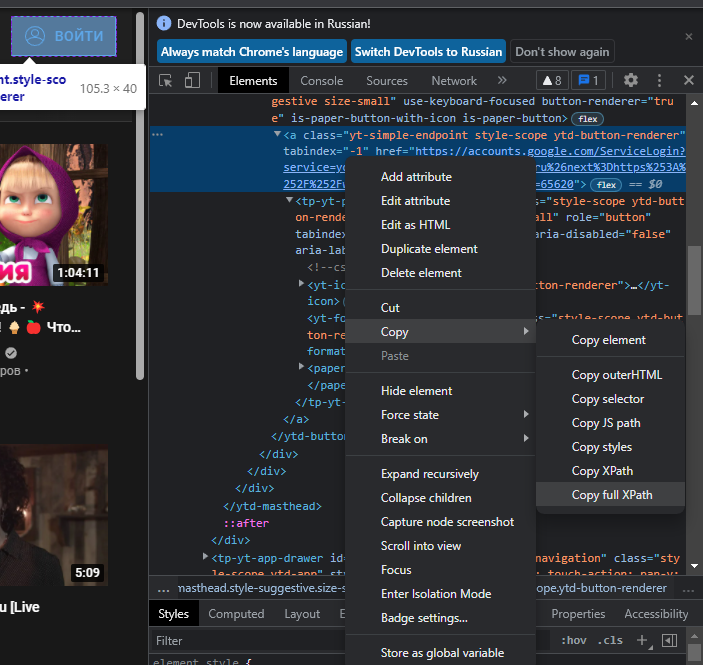

In [15]:
driver.get("https://www.youtube.com/")

xpath = '/html/body/ytd-app/div[1]/div/ytd-masthead/div[3]/div[3]/div[2]/ytd-button-renderer/a/tp-yt-paper-button'
element = driver.find_element(by=By.XPATH, value=xpath) 
element.click()

Ура! Теперь проделав такие же действия можно авторизироваться на любых сайтах, если это нужно.

Возможности selenium многообразны. Научимся делать скриншот страницы. Как и всегда, это делается одной строчкой.

In [16]:
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get("https://nometa.xyz/")
driver.save_screenshot('screenie.png') # Скриншот можно найти в папке с исходником



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\Nick\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
C:\Users\Nick\AppData\Local\Temp/ipykernel_21336/3313964439.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


True

Еще одной особенностью selenium является сохранение cookies. Это нужно для того, чтобы вы могли продолжать сессию браузера, авторизировавшись один раз в самом начале.

In [7]:
# !pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=4338098eebd6638590fe57cffecd3f98e251bf765aad5e6b288cc20aa110670d
  Stored in directory: c:\users\alexander\appdata\local\pip\cache\wheels\58\c6\8b\061bd4edc8cea2b2235758c3e50473d08499236fbfdd21e6b3
Successfully built pickle-mixin


In [ ]:
from time import sleep
import pickle
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("user-data-dir=selenium") 
driver = webdriver.Chrome(ChromeDriverManager().install())


driver.get("https://github.com/")
sleep(30) # Для того, чтобы успеть авторизоваться на страничке
pickle.dump(driver.get_cookies(), open("github_cookies", "wb"))
print('Saving cookies completed!')


In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get("https://github.com/")

for cookie in pickle.load(open('github_cookies', 'rb')):  #  Загружаем куки
    del cookie['domain']  # Костыль. В новых версиях chromedriver не работает, если не убрать domain из кукисов
    driver.add_cookie(cookie)
    
print('Cookies have been loaded!')
driver.get("https://github.com/")


Теперь вы можете имитировать работу человека в браузере(не совсем человека, скорее бота...) Браузеры знают, что все эти действия выполняет бот, об этом даже сообщает chrome вверху окна.
Вы можете научиться это обходить, но для этого придется немного погуглить :)
Удачного скраппинга!